In [ ]:
#pip install control

In [1]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Funções de Transferência

In [2]:
Tsim = 300 #tempo simulação
s = ctl.TransferFunction.s

#### Planta

In [3]:
R1 = 1e3
R2 = 100e6
C = 50e-3
L = 1

P_s = R2/(R1*C*L*s**2 + (L+R1*R2*C)*s + (R1+R2))
display(P_s)

TransferFunction(array([1.e+08]), array([5.00000e+01, 5.00000e+09, 1.00001e+08]))

#### Controlador PID

In [10]:
Ki = 7
Kp = 45
Kd = 8

C_s = (Kd*s**2 + Kp*s + Ki) / s
display(C_s)

TransferFunction(array([ 8, 45,  7]), array([1, 0]))

#### Sensor

In [11]:
H_s = 1/1
display(H_s)

1.0

# Malha Fechada

In [12]:
Parte_superior = ctl.series(C_s, P_s) #Controlador * Planta

G1_s = ctl.feedback(Parte_superior, H_s, sign = -1) # Adiciona sensor (feedback)
display(G1_s)

TransferFunction(array([8.0e+08, 4.5e+09, 7.0e+08]), array([5.000000e+01, 5.800000e+09, 4.600001e+09, 7.000000e+08]))

# Resposta ao degrau

#### Respostas ao degrau

In [13]:
T, yout = ctl.step_response(P_s, Tsim)
T_mf, you_mf = ctl.step_response(G1_s, Tsim)


#### Função degrau unitário

In [14]:
T2 = np.linspace(-1, Tsim, 1000)

degrau = np.ones_like(T2)
degrau[T2<0] = 0

#### Plot resultados

Text(0.5, 1.0, 'Sistema de 2ª ordem')

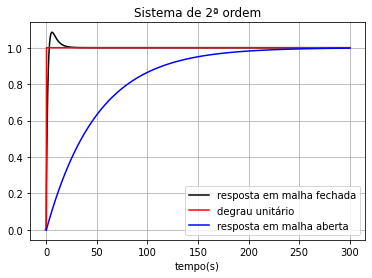

In [15]:
plt.plot(T_mf, you_mf, 'k-')
plt.plot(T2, degrau, 'r-')
plt.plot(T, yout, 'b-')
plt.xlabel('tempo(s)')
plt.legend(['resposta em malha fechada', 'degrau unitário', 'resposta em malha aberta'])
plt.grid()
plt.title('Sistema de 2ª ordem')